# Исследовательский анализ данных заведений общественного питания Москвы

- Автор:Бахман Анастасия Андреевна 
- Дата: 23.01.2026

### Цели и задачи проекта

<font color='#777778'>Цель проекта — провести исследовательский анализ рынка заведений общественного питания в Москве, чтобы на основе данных помочь инвесторам определить перспективный формат заведения, ценовой сегмент и потенциальное расположение.

Для достижения поставленной цели в рамках проекта необходимо решить следующие задачи:

изучить структуру рынка общественного питания Москвы;

проанализировать распределение заведений по категориям и административным районам;

сравнить сетевые и несетевые заведения;

исследовать вместимость заведений и их рейтинги;

проанализировать ценовые показатели и их зависимость от расположения;

выявить факторы, наиболее сильно связанные с рейтингом заведений;

сформулировать выводы и рекомендации для заказчика на основе полученных результатов.</font>

### Описание данных

<font color='#777778'>В проекте используются два датасета с информацией о заведениях общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес за лето 2022 года.

Датасет rest_info.csv содержит следующие столбцы:

name — название заведения;

address — адрес заведения;

district — административный район Москвы;

category — категория заведения (кафе, ресторан, кофейня и др.);

hours — информация о режиме работы;

rating — рейтинг заведения по оценкам пользователей;

chain — признак сетевого заведения (1 — сетевое, 0 — несетевое);

seats — количество посадочных мест.

Датасет rest_price.csv содержит информацию о ценах:

price — ценовая категория заведения;

avg_bill — текстовое описание среднего чека;

middle_avg_bill — числовая оценка среднего чека;

middle_coffee_cup — числовая оценка стоимости чашки капучино.</font>

### Содержимое проекта

<font color='#777778'>Загрузка данных и первичное знакомство
Изучение структуры датасетов, проверка типов данных, наличия пропусков и объединение таблиц.

Предобработка данных
Обработка пропусков, приведение типов данных, удаление дубликатов, создание дополнительных признаков.

Исследовательский анализ данных
Анализ распределений, сравнение категорий заведений, районов, сетевых и несетевых форматов, ценовых показателей, рейтингов и выявление взаимосвязей между признаками с использованием визуализаций.

Итоговые выводы и рекомендации
Обобщение результатов анализа и формирование рекомендаций для заказчика.</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd

# загрузка данных
rest_info = pd.read_csv('/datasets/rest_info.csv')
rest_price = pd.read_csv('/datasets/rest_price.csv')


- Познакомьтесь с данными и изучите общую информацию о них.

In [2]:
rest_info.head()


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [3]:
rest_price.head()


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [4]:
rest_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
rest_price.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

В ходе первичного анализа были загружены два датасета с данными о заведениях общественного питания Москвы.

Датасет rest_info содержит 8406 строк и 9 столбцов. Пропуски обнаружены в столбцах hours и seats, при этом информация о количестве посадочных мест отсутствует у значительной части заведений. Остальные поля заполнены полностью, типы данных в целом корректны.

Датасет rest_price содержит 4058 строк и 5 столбцов. В нём присутствует большое количество пропусков в столбцах, связанных с ценами (price, middle_avg_bill, middle_coffee_cup), что указывает на неполноту ценовой информации.

Текстовые столбцы требуют дополнительной обработки, а данные — проверки на дубликаты. Для дальнейшего анализа датасеты будут объединены по идентификатору заведения.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [6]:
# объединение двух датасетов по уникальному id
data = rest_info.merge(rest_price, on='id', how='left')


In [7]:
# проверка структуры и типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [8]:
# просмотр первых строк объединённого датафрейма
data.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# проверка размера итогового датафрейма
data.shape

(8406, 13)

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [10]:
# проверка типов данных
data.dtypes


id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [11]:
# преобразование столбца chain в логический тип
data['chain'] = data['chain'].astype('bool')


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [12]:
# подсчёт пропусков по столбцам
data.isna().sum()


id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# доля пропусков по столбцам
data.isna().mean().sort_values(ascending=False)


middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

Пропуски в данных связаны с отсутствием информации у части заведений в источнике и особенностями формирования ценовых показателей. Они не носят технический характер и были оставлены без обработки.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [14]:
# проверка явных дубликатов
data.duplicated().sum()


0

In [15]:
# сохраняем количество строк ДО удаления
rows_before = data.shape[0]

# создаём очищенные версии названия и адреса
data['name_clean'] = data['name'].str.lower().str.strip()
data['address_clean'] = data['address'].str.lower().str.strip()

# удаляем неявные дубликаты по названию и адресу
data = data.drop_duplicates(subset=['name_clean', 'address_clean'])

# сохраняем количество строк ПОСЛЕ удаления
rows_after = data.shape[0]

# считаем, сколько строк удалено
rows_removed = rows_before - rows_after

# удаляем вспомогательные столбцы
data.drop(columns=['name_clean', 'address_clean'], inplace=True)

# выводим результат
rows_removed


4

В данных не обнаружено явных дубликатов строк. Для поиска неявных дубликатов были нормализованы названия и адреса заведений. В результате проверки и удаления неявных дубликатов было удалено 4 строки, соответствующие повторяющимся записям одних и тех же заведений. Общая структура датасета при этом сохранена.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [16]:
# функция, которая проверяет, работает ли заведение 24/7
def check_24_7(hours):
    if hours == 'ежедневно, круглосуточно':
        return True
    else:
        return False


In [17]:
# создаём столбец is_24_7
data['is_24_7'] = data['hours'].apply(check_24_7)


In [18]:
data[['hours', 'is_24_7']].head()


,hours,is_24_7
0,"ежедневно, 10:00–22:00",False
1,"ежедневно, 10:00–22:00",False
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,"ежедневно, 09:00–22:00",False
4,"ежедневно, 10:00–22:00",False


In [19]:
data['is_24_7'].value_counts()


False    7672
True      730
Name: is_24_7, dtype: int64

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В ходе предобработки данных два исходных датасета были объединены в единый датафрейм по уникальному идентификатору заведения. Проведена проверка типов данных, признак chain преобразован в логический тип.

Были проанализированы пропущенные значения. Пропуски выявлены в столбцах, связанных с режимом работы, количеством посадочных мест и ценовой информацией. Их появление связано с отсутствием данных у части заведений и особенностями формирования ценовых показателей, поэтому пропуски были оставлены без заполнения.

Обнаружены и удалены неявные дубликаты заведений по названию и адресу — удалено 4 строки, что составляет менее 0,1% от общего объёма данных. Явных дубликатов не выявлено.

Для дальнейшего анализа был создан дополнительный признак is_24_7, отражающий круглосуточный режим работы заведения.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [20]:
# подсчёт количества заведений по категориям
category_counts = data['category'].value_counts()

category_counts


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

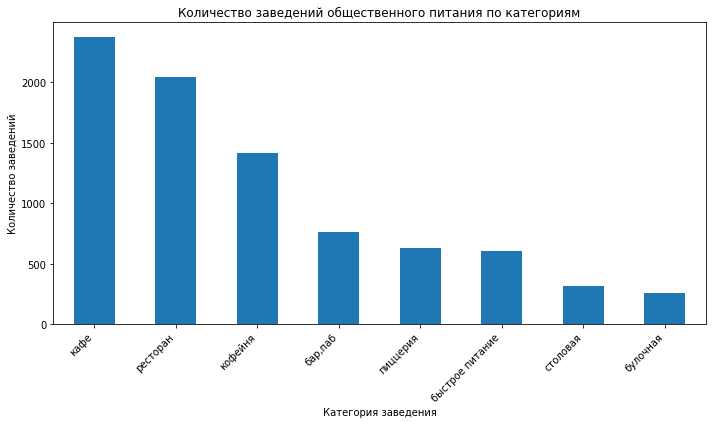

In [21]:
import matplotlib.pyplot as plt

# построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Количество заведений общественного питания по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


На рынке общественного питания Москвы доминируют кафе и рестораны. Остальные категории представлены значительно реже, что указывает на концентрацию рынка вокруг нескольких основных форматов.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [22]:
# подсчёт количества заведений по административным округам
district_counts = data['district'].value_counts()

district_counts


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

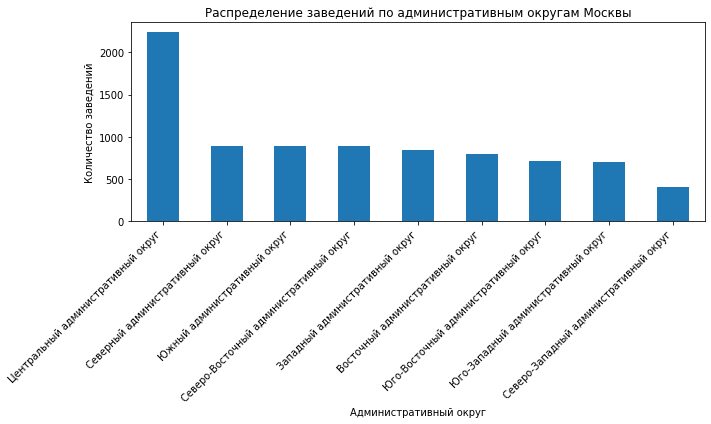

In [23]:
import matplotlib.pyplot as plt

# столбчатая диаграмма по административным округам
plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar')
plt.title('Распределение заведений по административным округам Москвы')
plt.xlabel('Административный округ')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Наибольшее количество заведений общественного питания сосредоточено в Центральном административном округе, что отражает высокую деловую и туристическую активность центра Москвы. В остальных округах количество заведений распределено более равномерно, с постепенным снижением по мере удаления от центра.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [24]:
# подсчёт сетевых и несетевых заведений
chain_counts = data['chain'].value_counts()

chain_counts


False    5199
True     3203
Name: chain, dtype: int64

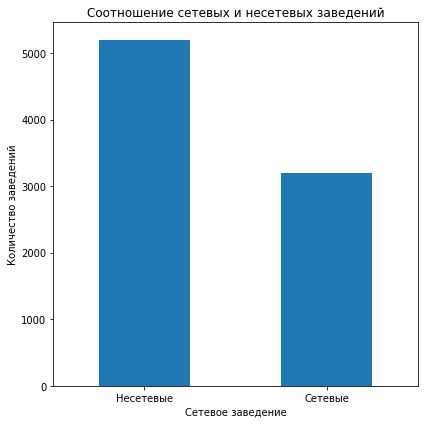

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
chain_counts.plot(kind='bar')
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Сетевое заведение')
plt.ylabel('Количество заведений')
plt.xticks(ticks=[0, 1], labels=['Несетевые', 'Сетевые'], rotation=0)
plt.tight_layout()
plt.show()


В данных преобладают несетевые заведения: их количество составляет около 5200, тогда как сетевых заведений — около 3200. Таким образом, рынок общественного питания Москвы в целом представлен преимущественно независимыми заведениями.

In [26]:
# доля сетевых заведений по категориям
chain_by_category = (
    data
    .groupby('category')['chain']
    .mean()
    .sort_values(ascending=False)
)

chain_by_category


category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509554
быстрое питание    0.384743
ресторан           0.357003
кафе               0.327862
столовая           0.279365
бар,паб            0.219895
Name: chain, dtype: float64

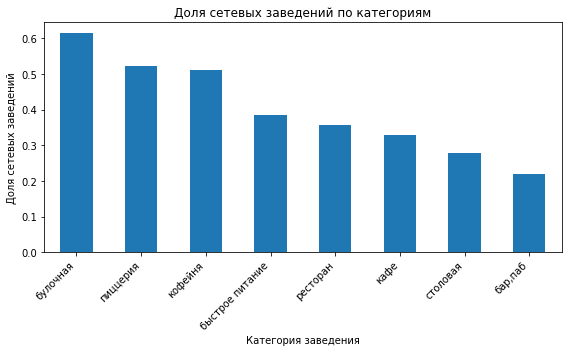

In [27]:
import matplotlib.pyplot as plt

# визуализация доли сетевых заведений по категориям
plt.figure(figsize=(8, 5))
chain_by_category.plot(kind='bar')
plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [28]:
# базовое описание столбца seats
data['seats'].describe()


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

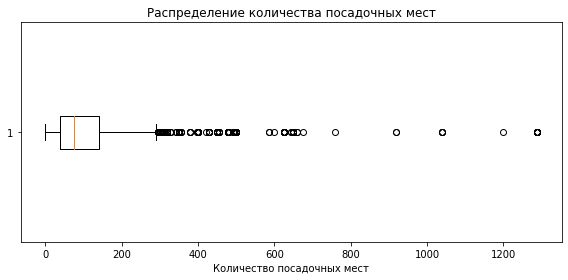

In [29]:
import matplotlib.pyplot as plt

# boxplot для выявления выбросов
plt.figure(figsize=(8, 4))
plt.boxplot(data['seats'].dropna(), vert=False)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.tight_layout()
plt.show()


In [30]:
# медианное количество посадочных мест по категориям
seats_by_category = (
    data
    .groupby('category')['seats']
    .median()
    .sort_values(ascending=False)
)

seats_by_category


category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

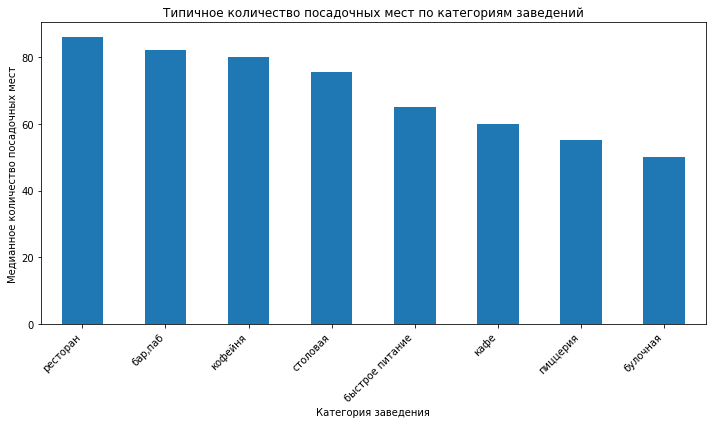

In [31]:
plt.figure(figsize=(10, 6))
seats_by_category.plot(kind='bar')
plt.title('Типичное количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Медианное количество посадочных мест')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Количество посадочных мест имеет сильную правостороннюю асимметрию: большинство заведений рассчитаны на 50–100 мест, при этом присутствуют выбросы (до ~1300 мест), вероятно связанные с крупными ресторанами, столовыми или фуд-холлами.
Наибольшее типичное число мест у ресторанов и баров, наименьшее — у булочных и пиццерий.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [32]:
# средний рейтинг по категориям заведений
rating_by_category = (
    data
    .groupby('category')['rating']
    .mean()
    .sort_values(ascending=False)
)

rating_by_category


category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

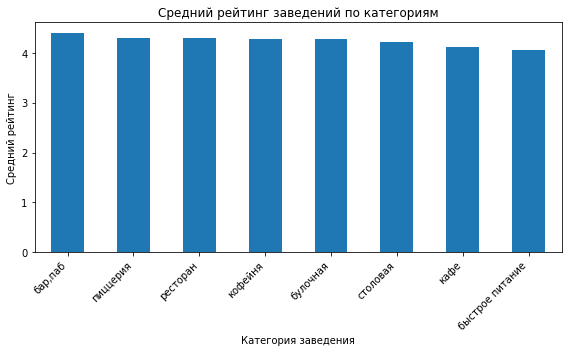

In [33]:
import matplotlib.pyplot as plt

# столбчатая диаграмма средних рейтингов
plt.figure(figsize=(8, 5))
rating_by_category.plot(kind='bar')
plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Средние рейтинги заведений по категориям близки друг к другу и находятся в диапазоне 4.05–4.39. Немного более высокие оценки получают бары/пабы и пиццерии, тогда как быстрое питание и кафе имеют чуть более низкий средний рейтинг. Существенных различий в уровне рейтингов между типами заведений не выявлено.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [34]:
pip install phik


     |████████████████████████████████| 677 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
import phik
import seaborn as sns
import matplotlib.pyplot as plt

phik_data = data[
    [
        'rating',
        'category',
        'district',
        'chain',
        'is_24_7',
        'seats',
        'middle_avg_bill'
    ]
]

# считаем phik-корреляцию
phik_corr = phik_data.phik_matrix()

phik_corr


interval columns not set, guessing: ['rating', 'seats', 'middle_avg_bill']


,rating,category,district,chain,is_24_7,seats,middle_avg_bill
rating,1.000000,0.189716,0.200761,0.107833,0.150365,0.000000,0.211868
category,0.189716,1.000000,0.174584,0.266000,0.244815,0.048923,0.053513
district,0.200761,0.174584,1.000000,0.064473,0.076357,0.352440,0.056558
chain,0.107833,0.266000,0.064473,1.000000,0.043488,0.056523,0.046206
is_24_7,0.150365,0.244815,0.076357,0.043488,1.000000,0.043193,0.046124
seats,0.000000,0.048923,0.352440,0.056523,0.043193,1.000000,0.045217
middle_avg_bill,0.211868,0.053513,0.056558,0.046206,0.046124,0.045217,1.000000


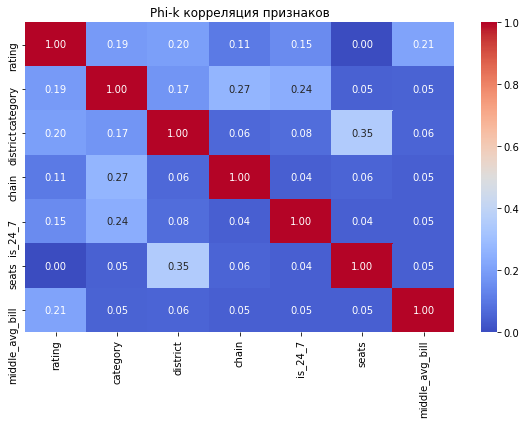

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    phik_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=0,
    vmax=1
)
plt.title('Phi-k корреляция признаков')
plt.tight_layout()
plt.show()



Для анализа связи рейтинга с числовыми и категориальными признаками использовался коэффициент phi-k. Тепловая карта показала отсутствие сильных зависимостей рейтинга от характеристик заведений. Наиболее заметная, но слабая связь наблюдается между рейтингом и средним чеком, что может указывать на более высокую оценку качества в заведениях с более высоким ценовым уровнем.

In [37]:
rating_corr = phik_corr['rating'].drop('rating')
rating_corr.sort_values(ascending=False)


middle_avg_bill    0.211868
district           0.200761
category           0.189716
is_24_7            0.150365
chain              0.107833
seats              0.000000
Name: rating, dtype: float64

наибольшая связь рейтинга наблюдается со средним чеком (middle_avg_bill);

значение корреляции около 0.21, что говорит о слабой, но наиболее заметной зависимости среди рассмотренных признаков.

In [38]:
data['bill_group'] = pd.qcut(data['middle_avg_bill'], 4)

data.groupby('bill_group')['rating'].median()


bill_group
(-0.001, 375.0]      4.2
(375.0, 750.0]       4.3
(750.0, 1250.0]      4.4
(1250.0, 35000.0]    4.4
Name: rating, dtype: float64

Дополнительно была проверена наиболее сильная выявленная связь — между рейтингом и средним чеком. Для этого средний чек был разбит на квартильные группы. Медианный рейтинг последовательно увеличивается от групп с низким средним чеком (4.2) к группам с более высоким чеком (до 4.4). Это подтверждает наличие слабой положительной зависимости: заведения более высокого ценового сегмента в среднем имеют немного более высокие рейтинги

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [39]:
# оставляем только сетевые заведения
chains = data[data['chain'] == True]


In [40]:
# считаем количество заведений в каждой сети
top_chains = (
    chains
    .groupby('name')
    .agg(
        places_count=('id', 'count'),
        avg_rating=('rating', 'mean'),
        category=('category', 'first')
    )
    .sort_values('places_count', ascending=False)
    .head(15)
)

top_chains


,places_count,avg_rating,category
name,,,
Шоколадница,120,4.177500,кофейня
Домино'с Пицца,76,4.169737,пиццерия
Додо Пицца,74,4.286486,пиццерия
One Price Coffee,71,4.064789,кофейня
Яндекс Лавка,69,3.872464,ресторан
Cofix,65,4.075385,кофейня
Prime,50,4.116000,ресторан
Хинкальная,44,4.322727,быстрое питание
КОФЕПОРТ,42,4.147619,кофейня


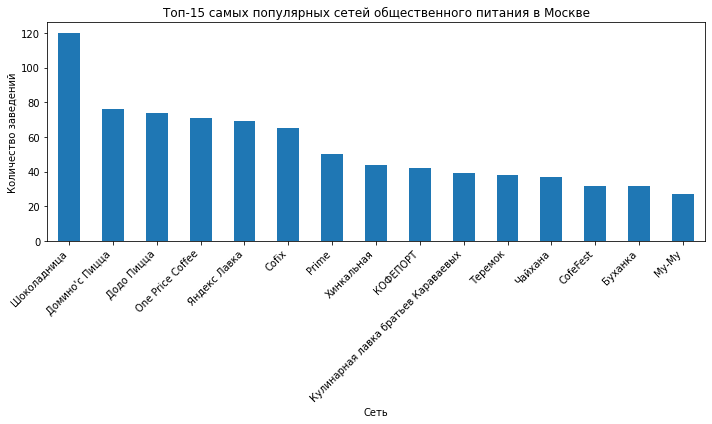

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_chains['places_count'].plot(kind='bar')
plt.title('Топ-15 самых популярных сетей общественного питания в Москве')
plt.xlabel('Сеть')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


В Москве самой популярной сетью является «Шоколадница» (120 заведений), относящаяся к категории кофеен. В топ-15 наиболее распространённых сетей преобладают кофейни и пиццерии, что говорит о высоком спросе на форматы быстрого и повседневного питания. Средние рейтинги популярных сетей находятся в диапазоне 4.0–4.4 и в целом остаются стабильными. При этом высокая популярность сети не всегда означает самый высокий пользовательский рейтинг.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [42]:
import matplotlib.pyplot as plt

# средний чек по административным округам
bill_by_district = (
    data.groupby('district')['middle_avg_bill']
    .median()            # медиана устойчивее к выбросам
    .sort_values(ascending=False)
)

bill_by_district


district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

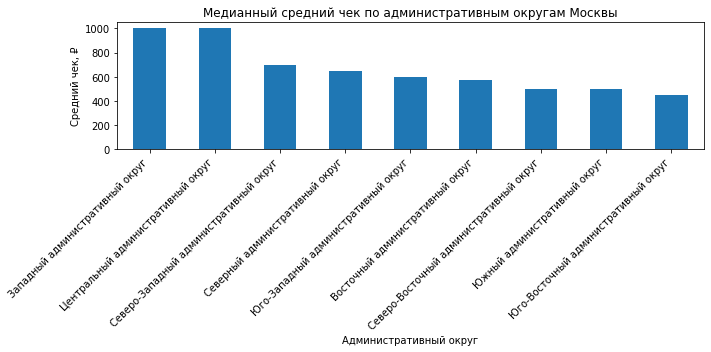

In [43]:
# визуализация
plt.figure(figsize=(10, 5))
bill_by_district.plot(kind='bar')
plt.title('Медианный средний чек по административным округам Москвы')
plt.xlabel('Административный округ')
plt.ylabel('Средний чек, ₽')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Максимальный медианный средний чек зафиксирован в Центральном и Западном административных округах (1000 ₽). В остальных округах медианный чек ниже и постепенно уменьшается с удалением от центра. Это подтверждает влияние локации на ценовой уровень заведений.

---


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

В ходе исследовательского анализа было выявлено, что в Москве преобладают заведения категорий «кафе» и «рестораны», а наибольшее их количество сосредоточено в Центральном административном округе. Несетевых заведений больше, чем сетевых, однако самые крупные сети в городе в основном относятся к кофейням и пиццериям. Типичное количество посадочных мест зависит от категории заведения: больше всего мест у ресторанов и баров, меньше — у булочных и пиццерий. Средние рейтинги заведений по категориям различаются незначительно и в целом находятся на высоком уровне. Анализ корреляций показал отсутствие сильной связи рейтинга с ценами, количеством мест, районом, сетевым статусом и режимом работы. Средний чек выше в центральных и западных округах и снижается по мере удаления от центра города.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.